<h3>Data loading, preparation and cleaning</h2>

In [6]:
import pandas as pd

file_dir = "../data/"
file_name = "positions_Python_11-09-2024.csv"
file_path = file_dir + file_name
df = pd.read_csv(file_path)

df.head()

,Position,Experience,Company,Location,Date,Details
0,Middle Python Back-end Developer,from 1 to 3 years,Inquatro,віддалено,6 вересня,We are seeking a highly skilled Middle Python...
1,Junior Python розробник,below year,Apriorit,"Київ, Дніпро, віддалено",28 серпня,Apriorit — компанія з розробки програмного заб...
2,Middle/Senior Python Developer,from 1 to 3 years,CHI Software,віддалено,7 серпня,The CHI Software team is not standing still. W...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"Київ, віддалено",4 вересня,"Українська IT-компанія Nova Digital, що входит..."
4,Middle Python developer,from 1 to 3 years,Exoft,Львів,4 вересня,The project is dedicated to enhancing the cong...


In [7]:
from datetime import datetime


month_translation = {
    "січня": "January",
    "лютого": "February",
    "березня": "March",
    "квітня": "April",
    "травня": "May",
    "червня": "June",
    "липня": "July",
    "серпня": "August",
    "вересня": "September",
    "жовтня": "October",
    "листопада": "November",
    "грудня": "December"
}

def convert_date(date_str):
    day, month_ukr = date_str.split()
    month_eng = month_translation[month_ukr]
    date_str_eng = f"{day} {month_eng} {datetime.now().year}"
    return datetime.strptime(date_str_eng, "%d %B %Y").date()

df["Date"] = df["Date"].apply(convert_date)
df.head()

,Position,Experience,Company,Location,Date,Details
0,Middle Python Back-end Developer,from 1 to 3 years,Inquatro,віддалено,2024-09-06,We are seeking a highly skilled Middle Python...
1,Junior Python розробник,below year,Apriorit,"Київ, Дніпро, віддалено",2024-08-28,Apriorit — компанія з розробки програмного заб...
2,Middle/Senior Python Developer,from 1 to 3 years,CHI Software,віддалено,2024-08-07,The CHI Software team is not standing still. W...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"Київ, віддалено",2024-09-04,"Українська IT-компанія Nova Digital, що входит..."
4,Middle Python developer,from 1 to 3 years,Exoft,Львів,2024-09-04,The project is dedicated to enhancing the cong...


In [8]:
df.dropna(inplace=True)
df

,Position,Experience,Company,Location,Date,Details
0,Middle Python Back-end Developer,from 1 to 3 years,Inquatro,віддалено,2024-09-06,We are seeking a highly skilled Middle Python...
1,Junior Python розробник,below year,Apriorit,"Київ, Дніпро, віддалено",2024-08-28,Apriorit — компанія з розробки програмного заб...
2,Middle/Senior Python Developer,from 1 to 3 years,CHI Software,віддалено,2024-08-07,The CHI Software team is not standing still. W...
3,Middle Python Engineer,from 1 to 3 years,Nova Digital,"Київ, віддалено",2024-09-04,"Українська IT-компанія Nova Digital, що входит..."
4,Middle Python developer,from 1 to 3 years,Exoft,Львів,2024-09-04,The project is dedicated to enhancing the cong...
...,...,...,...,...,...,...
136,Senior Python Developer,from 3 to 5 years,Starkflow,віддалено,2024-09-10,On behalf of our client — crypto-assets tradin...
137,Senior / Lead Python Software Engineer,from 3 to 5 years,EPAM,"Київ, Харків, Львів, Дніпро, Одеса, Вінниця, І...",2024-09-10,We are looking for an experienced Senior / Le...
138,Python Web Developer,from 3 to 5 years,Go Wombat,"Дніпро, Івано-Франківськ, Валенсія (Іспанія), ...",2024-09-06,У тебе є умови і бажання працювати? Любиш та в...
139,"Backend developer (Python, PHP)",from 3 to 5 years,Zviger LLC,віддалено,2024-09-06,"Привіт, майбутній колего! Ми — американська IT..."


<h3>Collection of statistics on technology in high demand</h2>

In [9]:
import re

technologies = [
    "Python", "Django", "Flask", "FastAPI", "SQL", "PostgreSQL", "MongoDB",
    "Docker", "Kubernetes", "AWS", "Azure", "Linux", "Git", "JavaScript", "React", "Angular",
    "Node.js", "TypeScript", "GraphQL", "Redis", "RabbitMQ", "Celery",
    "Jenkins", "Terraform", "Nginx", "Apache", "Bootstrap", "SASS", "JQuery", "Vue.js",
    "Spring Boot", "Ruby on Rails", "PHP", "Laravel", "C#", ".NET", "Java", "Kotlin",
    "Swift", "Golang", "Rust", "Scala", "Kafka", "Grafana", "Sentry", "Datadog", "JIRA",
    "Swagger", "Postman", "Figma", "GitLab", "Bitbucket", "Azure DevOps",
    "WordPress", "Firebase", "Supabase", "Jupyter", "Apache Airflow",
    "OpenShift", "Cloudflare", "Contentful", "Sanity", "Strapi", "GraphCMS"
]

def extract_technologies(text):
    found_technologies = []
    for tech in technologies:
        if re.search(r'\b' + re.escape(tech) + r'\b', text, re.IGNORECASE):
            found_technologies.append(tech)
    return found_technologies

df_technologies = df.drop(["Details", "Company", "Date", "Location", "Position"], axis=1)
df_technologies["Technologies"] = df["Details"].apply(lambda x: extract_technologies(str(x)))

df_technologies.set_index("Experience", inplace=True)

df_technologies

,Technologies
Experience,
from 1 to 3 years,"[Python, Django, Flask, FastAPI, PostgreSQL, D..."
below year,"[Python, Flask, Docker, Kubernetes, AWS, Git]"
from 1 to 3 years,"[Python, Django, Flask, SQL, PostgreSQL, AWS, ..."
from 1 to 3 years,[Python]
from 1 to 3 years,"[Python, Django, PostgreSQL, Kubernetes, JavaS..."
...,...
from 3 to 5 years,"[Python, Django, Flask, FastAPI, SQL, PostgreS..."
from 3 to 5 years,"[Python, AWS, Azure, Grafana]"
from 3 to 5 years,"[Python, Django, FastAPI, Docker, Git]"


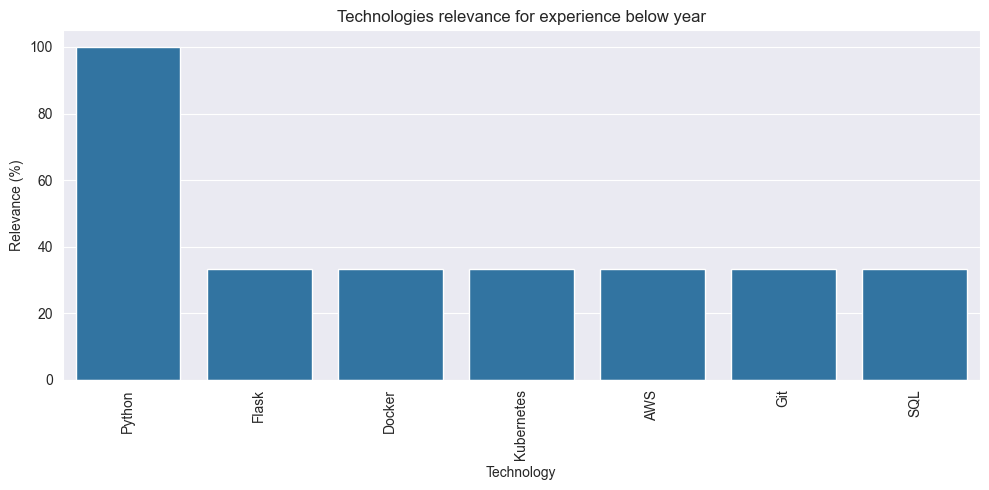

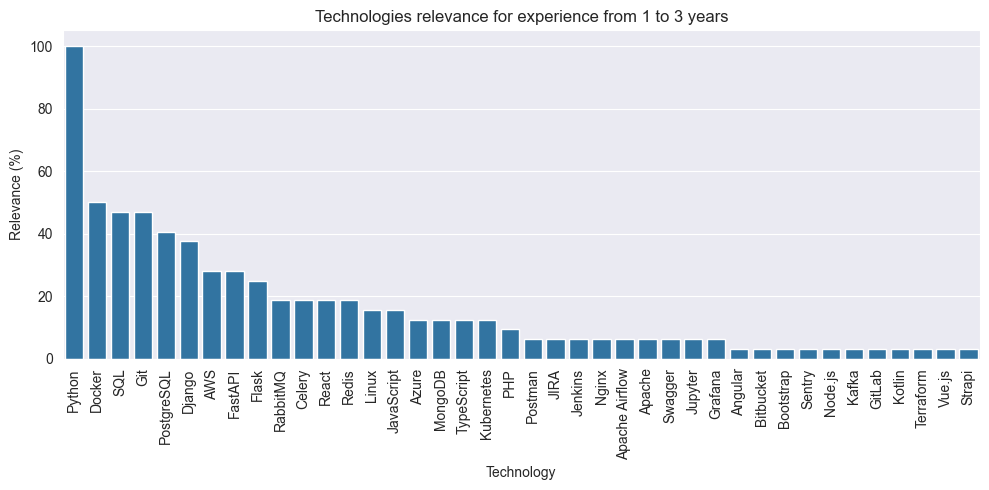

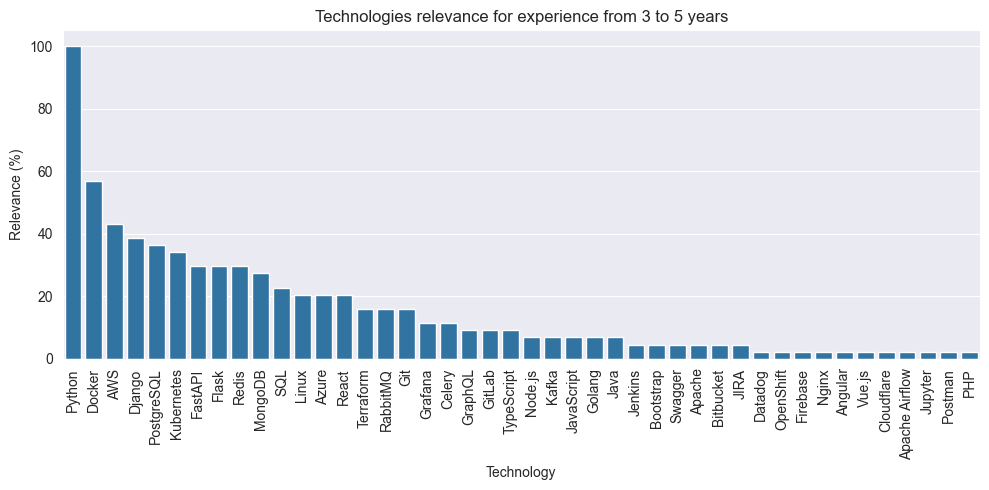

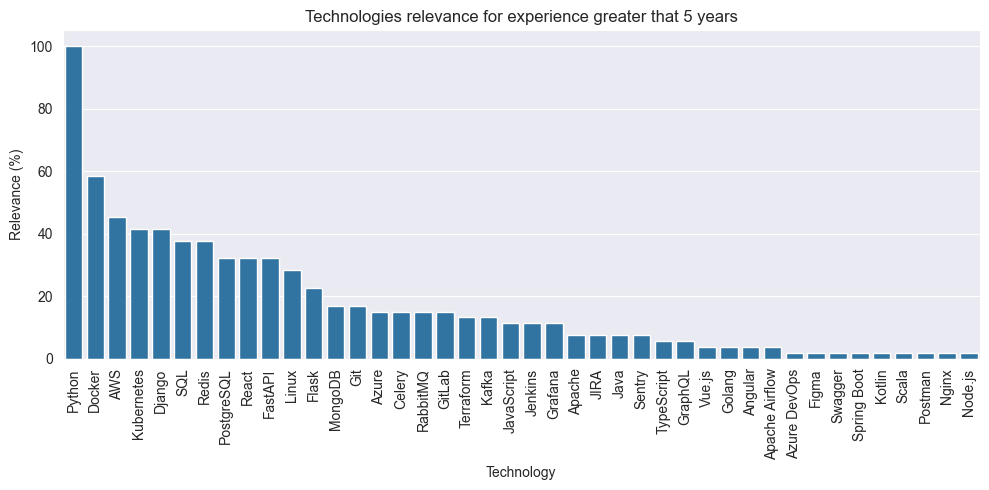

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


experience_tech_counts = {
    idx: Counter(
        tech for technologies_list in group["Technologies"]
        for tech in technologies_list
    )
    for idx, group in df_technologies.groupby(df_technologies.index)
}

for experience, tech_counter in experience_tech_counts.items():
    tech_data = pd.DataFrame(tech_counter.items(), columns=["Technology", "Count"])
    tech_data["Percentage"] = (tech_data["Count"] / tech_data["Count"].max()) * 100
    
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x="Technology", y="Percentage",
        data=tech_data.sort_values(by="Percentage", ascending=False)
    )
    
    plt.xticks(rotation=90)
    plt.title(f"Technologies relevance for experience {experience}")
    plt.ylabel('Relevance (%)')
    plt.tight_layout()
    plt.show()

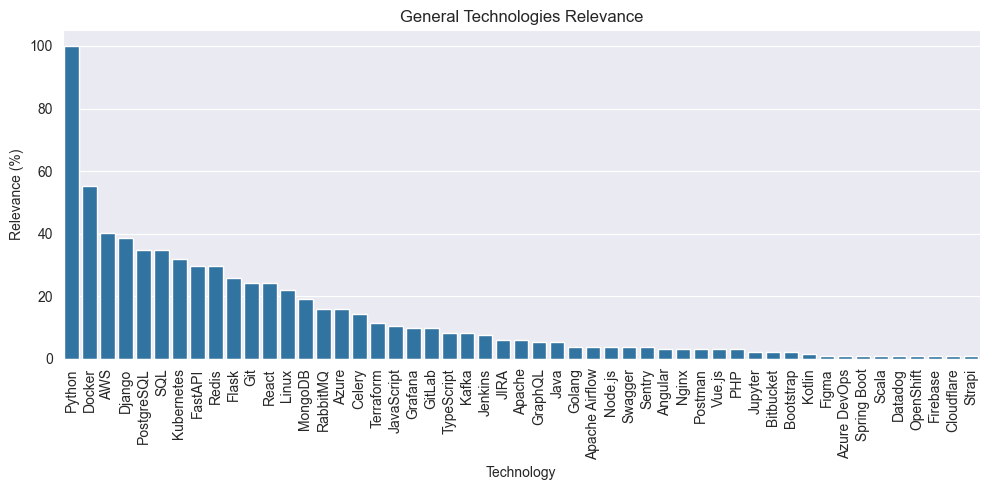

In [11]:
tech_counter = Counter(
    tech for technologies_list in df_technologies["Technologies"]
    for tech in technologies_list
)

tech_data = pd.DataFrame(tech_counter.items(), columns=["Technology", "Count"])
tech_data["Percentage"] = tech_data["Count"] / tech_data["Count"].max() * 100

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Technology", y="Percentage", 
    data=tech_data.sort_values(by="Percentage", ascending=False)
)
plt.xticks(rotation=90)
plt.title("General Technologies Relevance")
plt.ylabel('Relevance (%)')
plt.tight_layout()
plt.show()